# Seaborn Basics

1. Bar / line / Pie
2. Dist
3. Box
4. Strip
5. PairGrid (silimiar than pairplot but more functions)
6. Violin
7. Heatmaps
8. FacetGrid
9. KDE
10. Joint Plots
11.  Pair plots (similar than PairGrid but easier to use!)
12. Line Plots
13. 气泡图?

In [41]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

import pandas_profiling

%matplotlib inline


In [42]:
sns.__version__

'0.9.0'

In [328]:
sns.set_style('whitegrid')
#sns.set(style='darkgrid')

# 1. Seaborn Bar, Line, Pie

### 1.1 Barplot

In [ ]:
iris = pd.read_csv('./seaborn-data/iris.csv')
tips = pd.read_csv('./seaborn-data/tips.csv')

In [44]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

In [46]:
# use Pandas Profilig Report to get quick Overview of Dataset
pandas_profiling.ProfileReport(tips)

In [48]:
# Pandas Profiling Report for dataset iris >>
pandas_profiling.ProfileReport(iris)

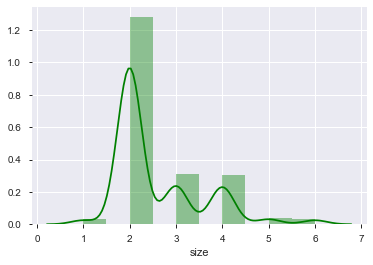

In [49]:
# use dist to check how value of a single series is distrubted
# have to use tips['size'], instead of tips.size

sns.distplot(tips['size'], bins = 10, kde = True, hist = True, color ='g') 

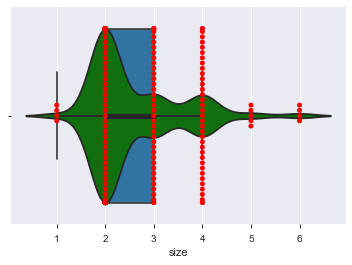

In [50]:
# very good ways to check certain value series are distributed

sns.boxplot(tips['size'])
sns.violinplot(tips['size'], color = 'g')
sns.swarmplot(tips['size'], color ='r')

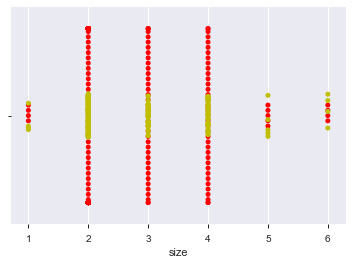

In [51]:
sns.swarmplot(tips['size'], color ='r')
sns.stripplot(tips['size'], color = 'y')

In [52]:
tips.shape

(244, 7)

In [53]:
tips.dtypes

total_bill    float64
tip           float64
sex            object
smoker         object
day            object
time           object
size            int64
dtype: object

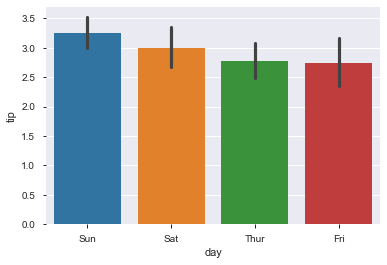

In [54]:
sns.barplot(x = 'day', y = 'tip', data = tips) # basic para -- x, y, dataset

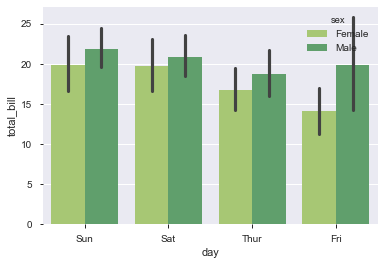

In [55]:
sns.barplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', palette ='summer_r') # use hue, and palette

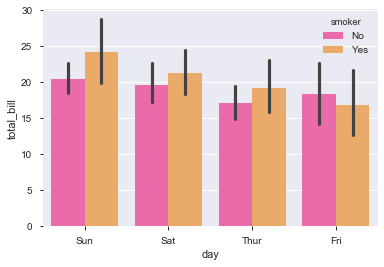

In [56]:
sns.barplot(x = 'day', y = 'total_bill', data = tips, hue = 'smoker', palette ='spring') # diffrent hue, and str for palette (better than use just color para)

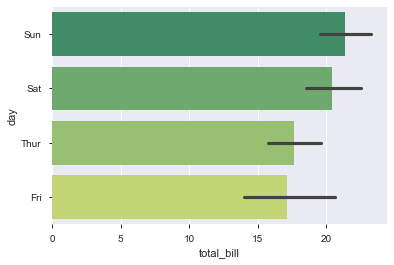

In [57]:
sns.barplot(x = 'total_bill', y = 'day', data = tips, palette = 'summer') # horizental barplot

In [58]:
tips.tail()

total_bill   tip     sex smoker   day    time  size
239       29.03  5.92    Male     No   Sat  Dinner     3
240       27.18  2.00  Female    Yes   Sat  Dinner     2
241       22.67  2.00    Male    Yes   Sat  Dinner     2
242       17.82  1.75    Male     No   Sat  Dinner     2
243       18.78  3.00  Female     No  Thur  Dinner     2

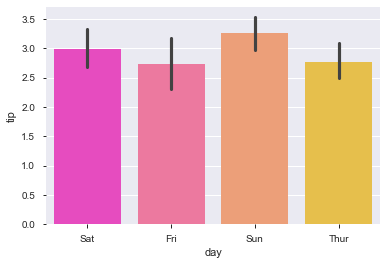

In [59]:
sns.barplot(x = 'day', y = 'tip', data = tips, palette = 'spring', order = ['Sat', 'Fri', 'Sun','Thur']) # use of order para

In [60]:
tips.shape

(244, 7)

In [61]:
tips.day.value_counts()

Sat     87
Sun     76
Thur    62
Fri     19
Name: day, dtype: int64

In [62]:
tips.time.value_counts()

Dinner    176
Lunch      68
Name: time, dtype: int64

In [63]:
tips.describe(include ='all')

total_bill         tip   sex smoker  day    time        size
count   244.000000  244.000000   244    244  244     244  244.000000
unique         NaN         NaN     2      2    4       2         NaN
top            NaN         NaN  Male     No  Sat  Dinner         NaN
freq           NaN         NaN   157    151   87     176         NaN
mean     19.785943    2.998279   NaN    NaN  NaN     NaN    2.569672
std       8.902412    1.383638   NaN    NaN  NaN     NaN    0.951100
min       3.070000    1.000000   NaN    NaN  NaN     NaN    1.000000
25%      13.347500    2.000000   NaN    NaN  NaN     NaN    2.000000
50%      17.795000    2.900000   NaN    NaN  NaN     NaN    2.000000
75%      24.127500    3.562500   NaN    NaN  NaN     NaN    3.000000
max      50.810000   10.000000   NaN    NaN  NaN     NaN    6.000000

In [64]:
from numpy import median

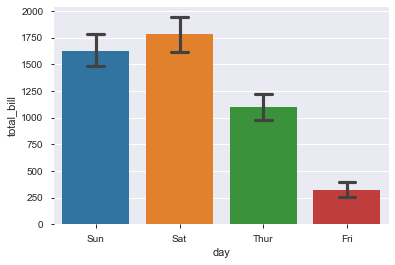

In [65]:
# by default, the Seaborn barplot uses mean as agg func: estimator = agg!
sns.barplot(y = 'total_bill', x = 'day', data = tips, estimator = sum, capsize =0.2 ) 

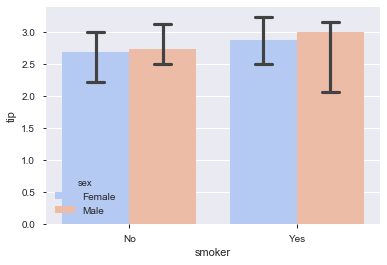

In [66]:
#ci: confidence interval, capsize 
sns.barplot(x = 'smoker', y ='tip', data = tips, hue = 'sex', estimator = median, \
            palette = 'coolwarm', ci = 95, capsize =  0.1)
plt.title ='test'

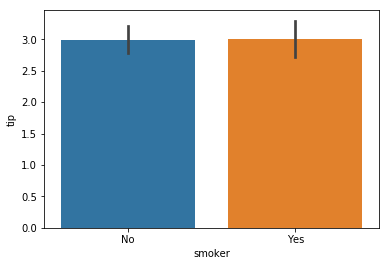

In [19]:
sns.barplot(x = 'smoker', y = 'tip', data = tips, ci = 95 )

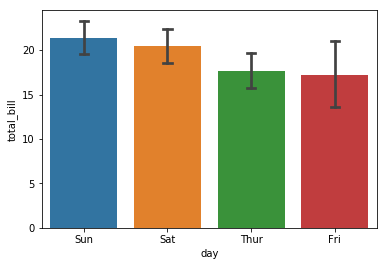

In [20]:
sns.barplot(x = 'day', y = 'total_bill', data = tips, ci = 95, capsize =  0.1)

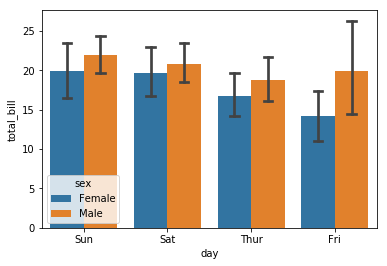

In [21]:
sns.barplot(x = 'day', y = 'total_bill', hue ='sex', data = tips, ci = 95, capsize =  0.1)

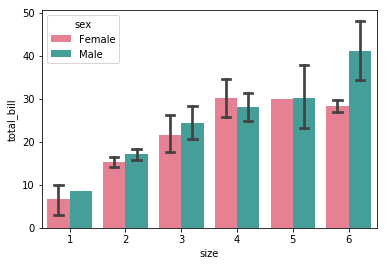

In [22]:
sns.barplot(x = 'size', y = 'total_bill', hue ='sex', data = tips, ci = 95, capsize =  0.15, palette ='husl')

In [23]:
tips.corr()

total_bill       tip      size
total_bill    1.000000  0.675734  0.598315
tip           0.675734  1.000000  0.489299
size          0.598315  0.489299  1.000000

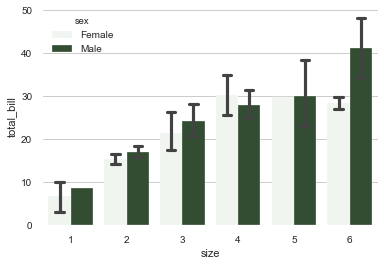

In [333]:
# can also simply use the color oara than palette
sns.barplot(x = 'size', y = 'total_bill', hue ='sex', data = tips, ci = 95, capsize =  0.15,\
            color ='green', saturation = 0.2) 

### 1.2 Line chart - sns.lineplot(x, y, data =)

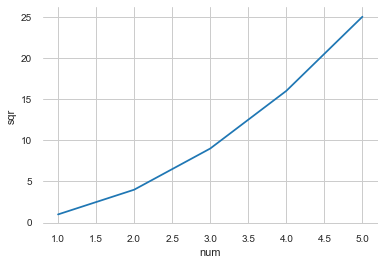

In [330]:
num = np.array([1, 2, 3, 4, 5])
sqr = np.array([1, 4, 9, 16, 25])

# convert to pandas dataframe
d = {'num': num, 'sqr': sqr}
pdnumsqr = pd.DataFrame(d)

sns.lineplot(x='num', y='sqr', data=pdnumsqr)

### 1.3  Stack plot - plt.stackplot

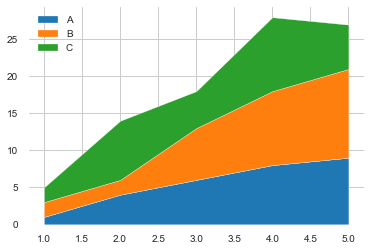

In [334]:
x=range(1,6)
y=[ [1,4,6,8,9], [2,2,7,10,12], [2,8,5,10,6] ]
 
# Plot
plt.stackplot(x,y, labels=['A','B','C'])
plt.legend(loc='upper left')
plt.show()


# 2. Seaborn - Dist Plots

In [331]:
num = np.random.randn(150)

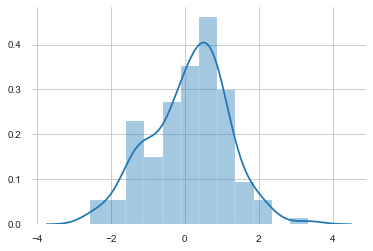

In [332]:
sns.distplot(num)

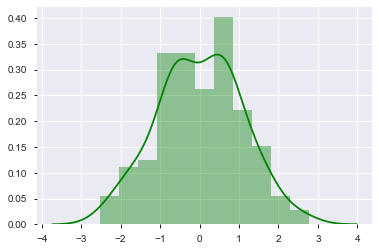

In [73]:
sns.distplot(num, color = 'green',)

In [74]:
label_list = pd.Series(num, name = 'variable x')

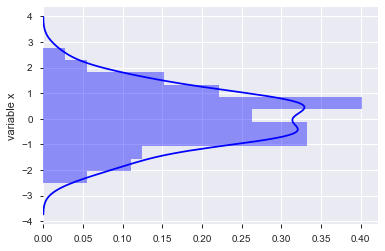

In [75]:
sns.distplot(label_list, color = 'blue', vertical = True)

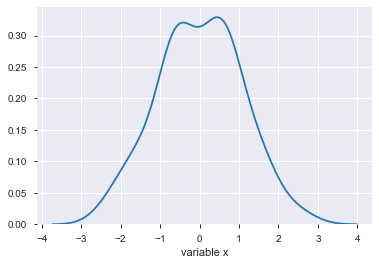

In [76]:
sns.distplot(label_list, hist = False, kde = True)

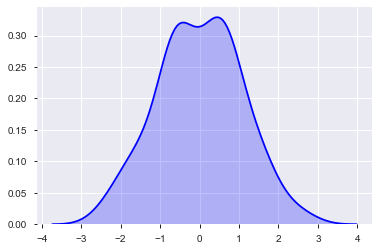

In [77]:
# hist shade - kde_kws = ('shade': True)

sns.distplot(num, color = 'blue',  hist = False, kde_kws={"shade": True}, kde=True)

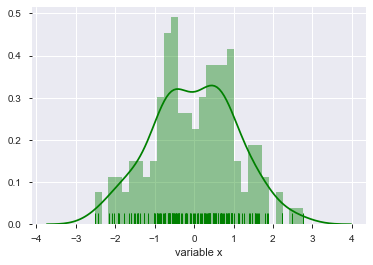

In [81]:
sns.distplot(label_list, color = 'green', hist = True,  kde = True, rug = True, bins = 30) # rug shows the density from x axis direction

# 3. Seaborn - Box Plots

In [83]:
tips.sample(5)

total_bill   tip     sex smoker   day    time  size
148        9.78  1.73    Male     No  Thur   Lunch     2
19        20.65  3.35    Male     No   Sat  Dinner     3
186       20.90  3.50  Female    Yes   Sun  Dinner     3
39        31.27  5.00    Male     No   Sat  Dinner     3
36        16.31  2.00    Male     No   Sat  Dinner     3

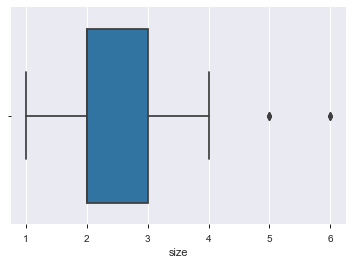

In [84]:
sns.boxplot( x =tips['size'])

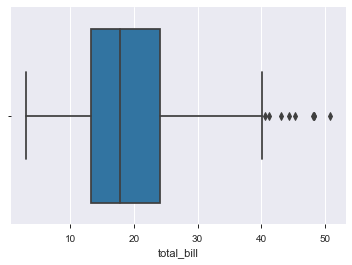

In [85]:
sns.boxplot( x =tips[ 'total_bill'])

In [86]:
tips.total_bill.mean()

19.785942622950824

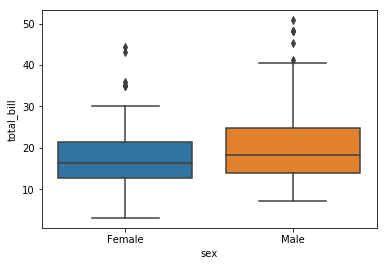

In [37]:
sns.boxplot( x = 'sex', y = 'total_bill', data = tips)

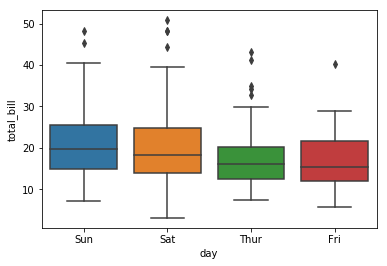

In [38]:
sns.boxplot( x = 'day', y = 'total_bill', data = tips)

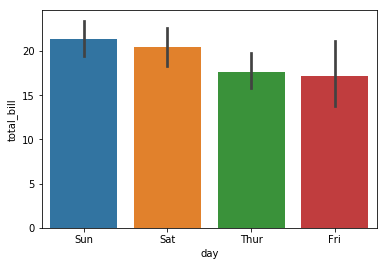

In [39]:
sns.barplot( x = 'day', y = 'total_bill', data = tips) # default agg func is mean

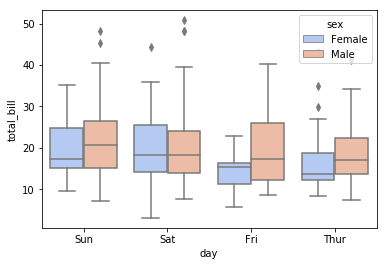

In [40]:
sns.boxplot( x = 'day', y = 'total_bill', data = tips, hue = 'sex', palette = 'coolwarm', order =['Sun', 'Sat','Fri','Thur']) #order para usage

In [42]:
#iris = sns.load_dataset('iris')

In [43]:
iris.sample(5)

sepal_length  sepal_width  petal_length  petal_width     species
64           5.6          2.9           3.6          1.3  versicolor
56           6.3          3.3           4.7          1.6  versicolor
25           5.0          3.0           1.6          0.2      setosa
20           5.4          3.4           1.7          0.2      setosa
92           5.8          2.6           4.0          1.2  versicolor

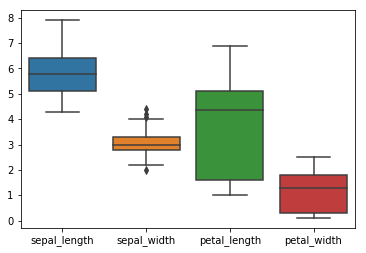

In [44]:
sns.boxplot(data=iris)

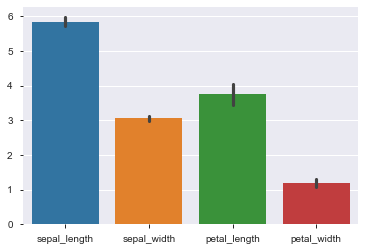

In [87]:
sns.barplot(data = iris)

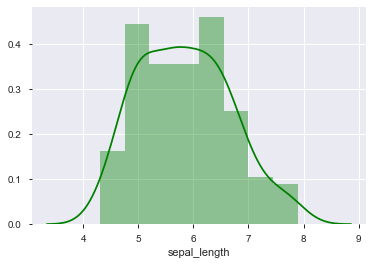

In [88]:
sns.distplot(iris['sepal_length'], color = 'green')

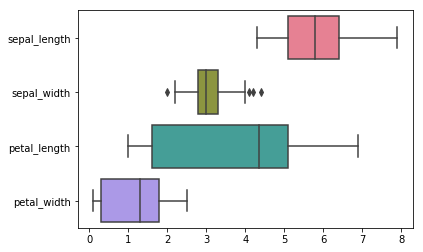

In [47]:
sns.boxplot(data = iris, orient = 'horizental', palette = 'husl') # use orententation para

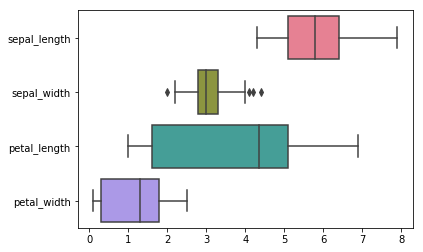

In [48]:
sns.boxplot(data = iris, orient = 'h', palette = 'husl') # use orententation para

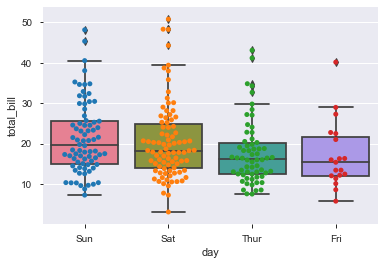

In [89]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, palette = 'husl')
sns.swarmplot(x = 'day', y = 'total_bill', data = tips)

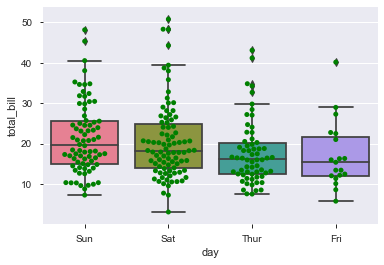

In [90]:
sns.boxplot(x = 'day', y = 'total_bill', data = tips, palette = 'husl')
sns.swarmplot(x = 'day', y = 'total_bill', data = tips, color = 'green')

# 4. Seaborn - Strip Plot

In [96]:
# use tips as the dataset still

In [97]:
tips.sample(5)

total_bill   tip     sex smoker   day    time  size
122       14.26  2.50    Male     No  Thur   Lunch     2
162       16.21  2.00  Female     No   Sun  Dinner     3
44        30.40  5.60    Male     No   Sun  Dinner     4
15        21.58  3.92    Male     No   Sun  Dinner     2
215       12.90  1.10  Female    Yes   Sat  Dinner     2

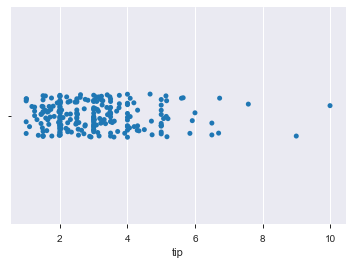

In [98]:
sns.stripplot(x= tips['tip']) # strip plot for one series only - one dimension

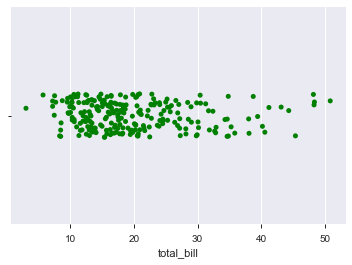

In [99]:
sns.stripplot(x= tips['total_bill'], color = 'green') # strip plot for one series only - one dimension

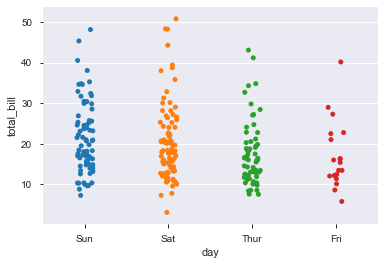

In [100]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips)

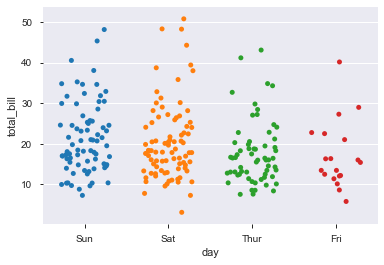

In [101]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, jitter = 0.3) # use Jitter value to make it more illustrative

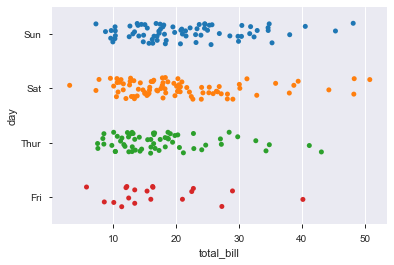

In [102]:
sns.stripplot(x = 'total_bill', y = 'day', data = tips, jitter = 0.2)

In [58]:
sns.__version__

'0.9.0'

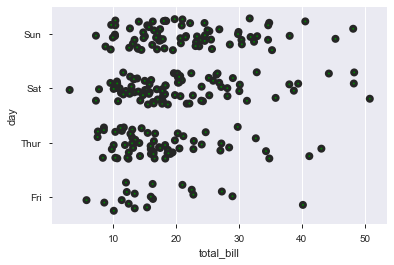

In [105]:
sns.stripplot(x = 'total_bill', y = 'day', data = tips, jitter = 0.3, linewidth = 3, color = 'green')

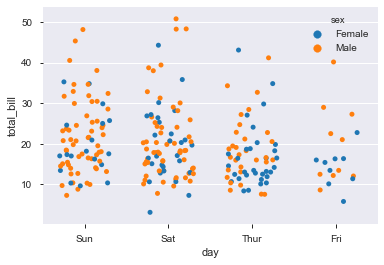

In [106]:
sns.stripplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', jitter = 0.3) # use hue - very good illustration

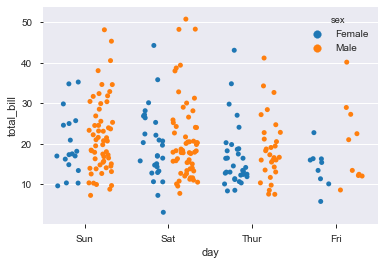

In [107]:
# use hue & split to finetune illustration
sns.stripplot(x = 'day', y = 'total_bill', data = tips, hue = 'sex', jitter = 0.3, split = True) 

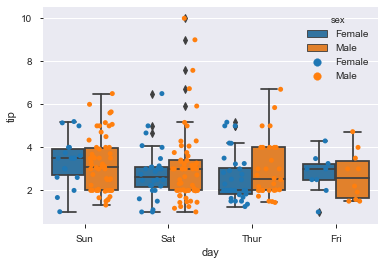

In [108]:
sns.stripplot(y = 'tip', x = 'day', data = tips, jitter = 0.3, hue = 'sex', split = True)
sns.boxplot(y = 'tip',  x = 'day', data = tips, hue ='sex')

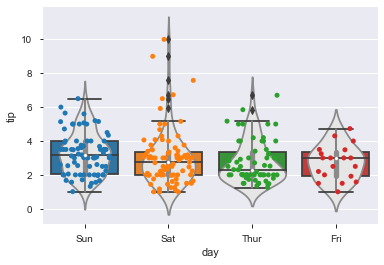

In [109]:
sns.stripplot(y = 'tip', x = 'day', data = tips, jitter = 0.3)
sns.boxplot(y = 'tip',  x = 'day', data = tips)
sns.violinplot(y = 'tip',  x = 'day', data = tips, color = '0.9')

# 5. Seaborn - PairGrid

In [110]:
# use Iris dataset

In [111]:
# iris = sns.load_dataset('iris')

In [113]:
iris.sample(5)

sepal_length  sepal_width  petal_length  petal_width     species
114           5.8          2.8           5.1          2.4   virginica
148           6.2          3.4           5.4          2.3   virginica
76            6.8          2.8           4.8          1.4  versicolor
126           6.2          2.8           4.8          1.8   virginica
138           6.0          3.0           4.8          1.8   virginica

In [114]:
iris.corr() # corration only works for numerica datatypes columns??

sepal_length  sepal_width  petal_length  petal_width
sepal_length      1.000000    -0.117570      0.871754     0.817941
sepal_width      -0.117570     1.000000     -0.428440    -0.366126
petal_length      0.871754    -0.428440      1.000000     0.962865
petal_width       0.817941    -0.366126      0.962865     1.000000

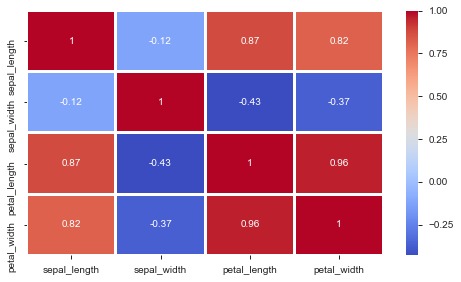

In [124]:
plt.figure(figsize = (8, 4.5))

sns.heatmap(iris.corr(), cmap = 'coolwarm', linewidth = 2, annot = True)

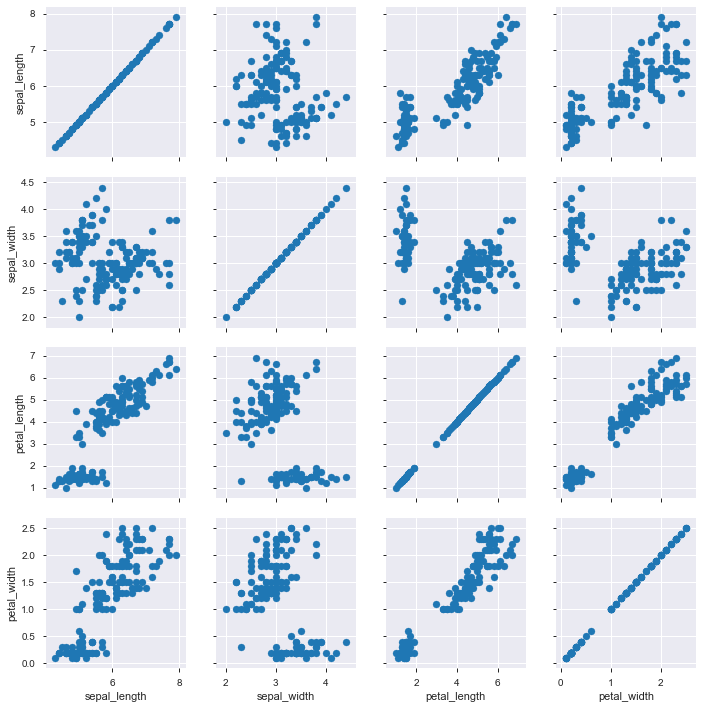

In [125]:
x = sns.PairGrid(iris)
x = x.map(plt.scatter)

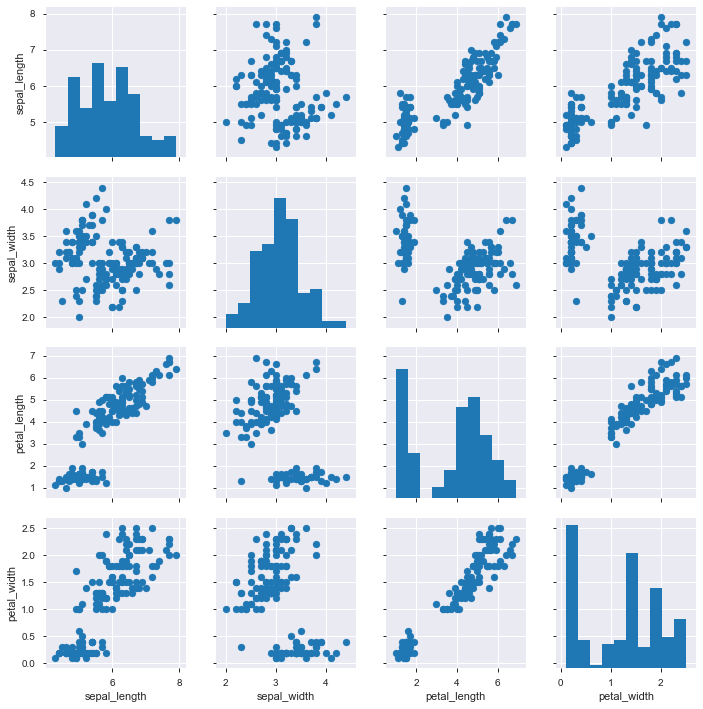

In [126]:
x = sns.PairGrid(iris)
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)

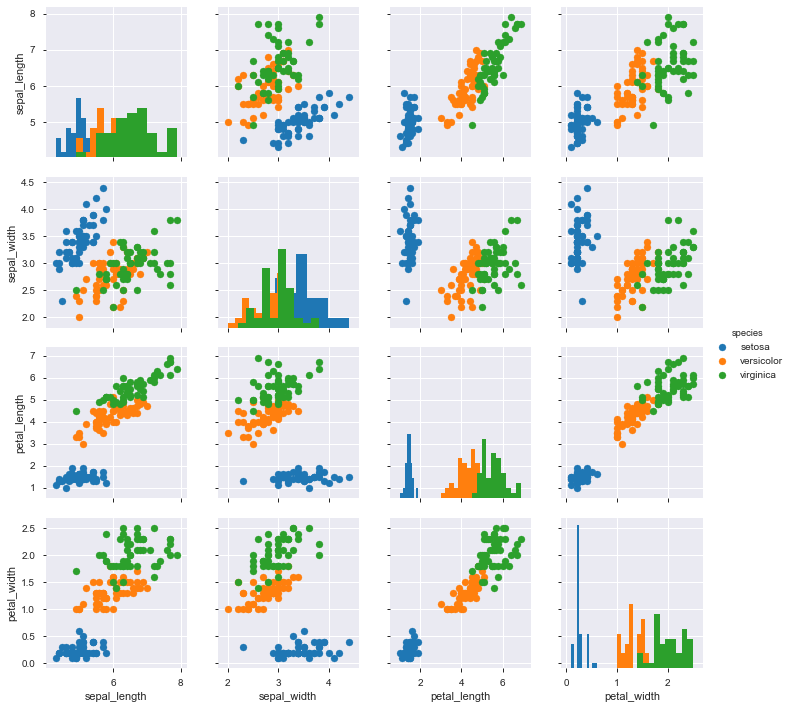

In [127]:
x = sns.PairGrid(iris, hue = 'species')
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

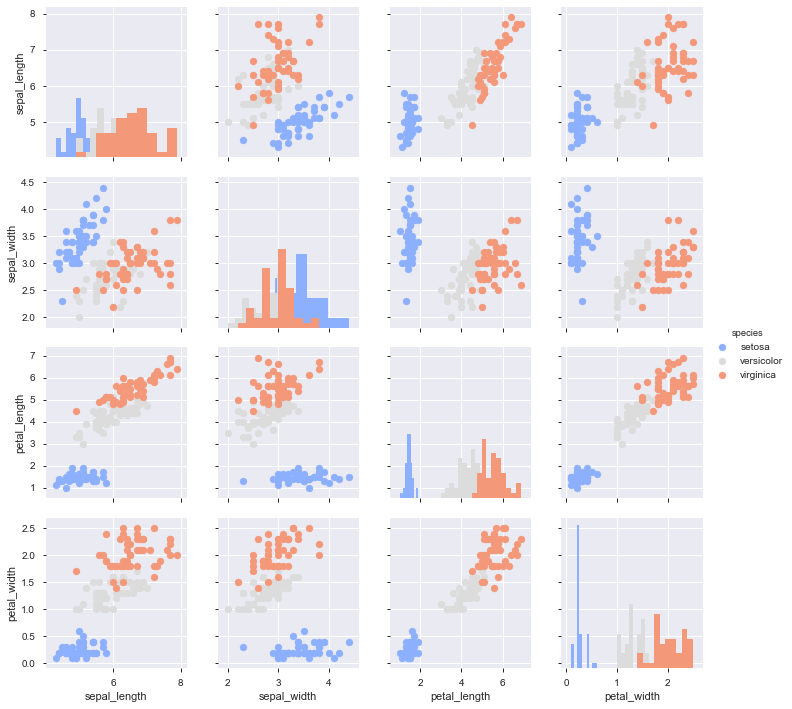

In [128]:
x = sns.PairGrid(iris, hue = 'species', palette = 'coolwarm') # husl, winter_r, RdBu, coolwarm
x = x.map_diag(plt.hist)
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

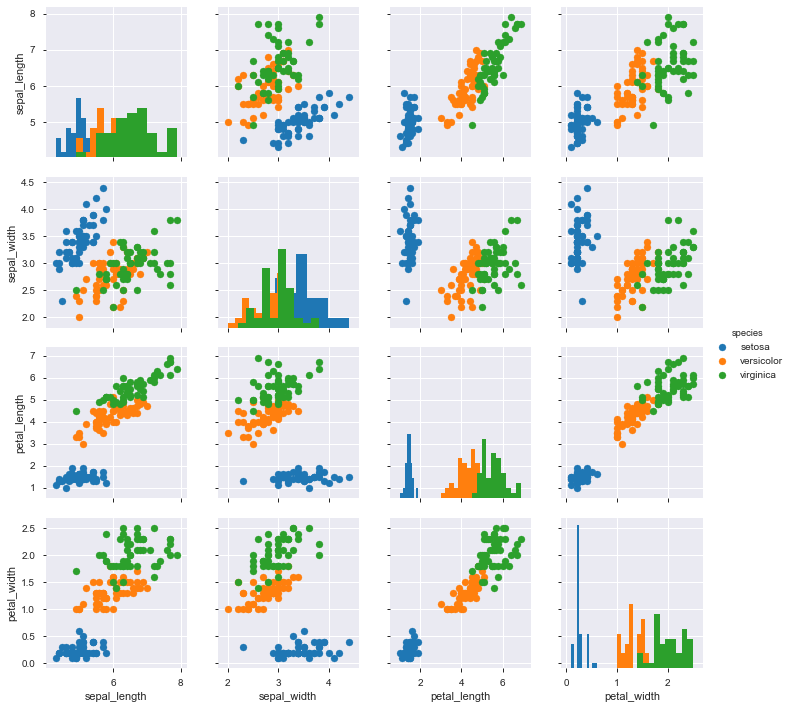

In [130]:
x = sns.PairGrid(iris, hue = 'species')

x = x.map_diag(plt.hist, histtype = 'stepfilled') # histtype: step, stepfilled, 
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

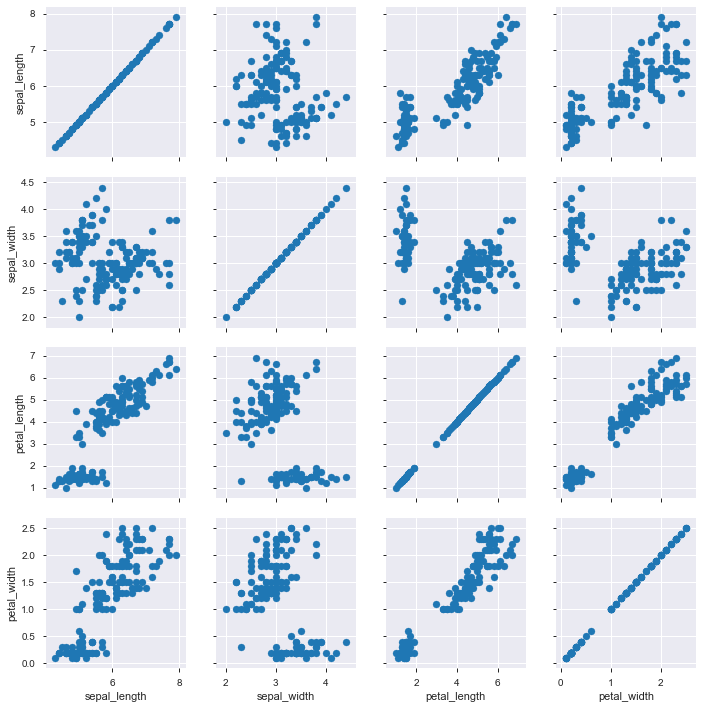

In [131]:
x = sns.PairGrid(iris)
x = x.map(plt.scatter)

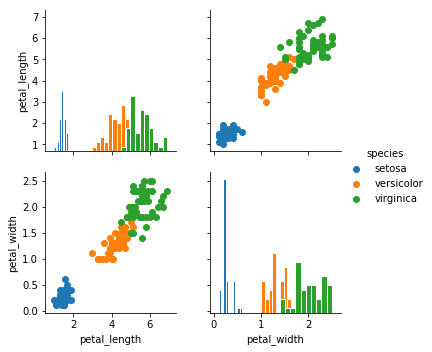

In [75]:
x = sns.PairGrid(iris, vars = ['petal_length','petal_width'], hue ='species')
x = x.map_diag(plt.hist, edgecolor = 'white' )
x = x.map_offdiag(plt.scatter)
x = x.add_legend()

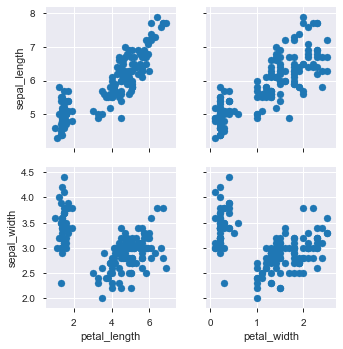

In [132]:
x = sns.PairGrid(iris, x_vars = ['petal_length','petal_width'], \
                 y_vars = ['sepal_length', 'sepal_width'])
x = x.map(plt.scatter)

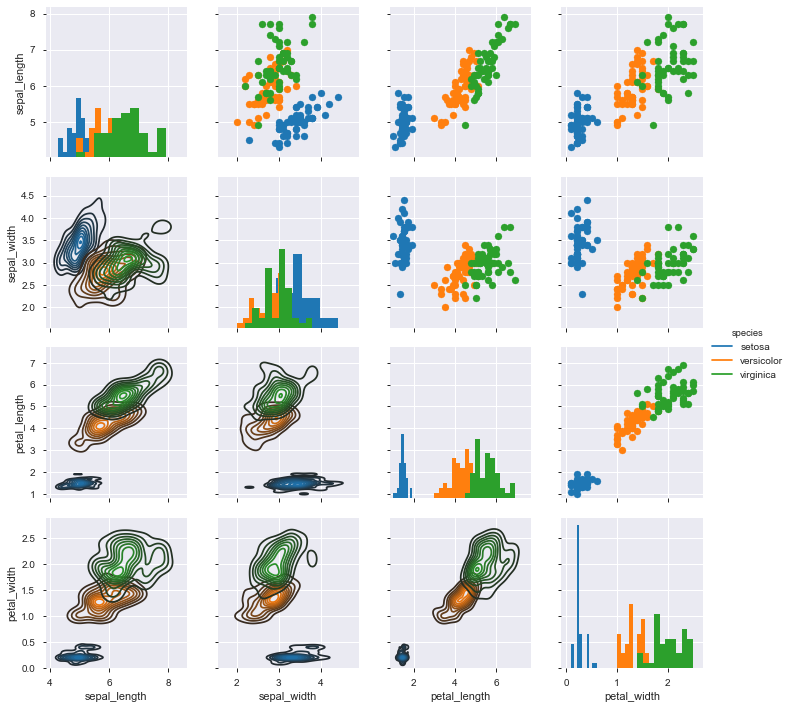

In [133]:
x = sns.PairGrid(iris, hue = 'species')

x = x.map_diag(plt.hist)
x = x.map_upper(plt.scatter)  # map upper / lower can be with different plot method
x = x.map_lower(sns.kdeplot) # kde plot looks to be very interesting!!
x = x.add_legend()

# 6. Seaborn - Violin Plot

In [135]:
tips.sample(5)

total_bill   tip     sex smoker   day    time  size
95        40.17  4.73    Male    Yes   Fri  Dinner     4
223       15.98  3.00  Female     No   Fri   Lunch     3
130       19.08  1.50    Male     No  Thur   Lunch     2
117       10.65  1.50  Female     No  Thur   Lunch     2
18        16.97  3.50  Female     No   Sun  Dinner     3

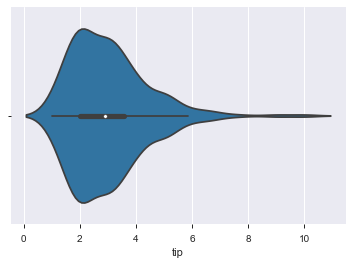

In [136]:
sns.violinplot(x = tips.tip) # single series plot

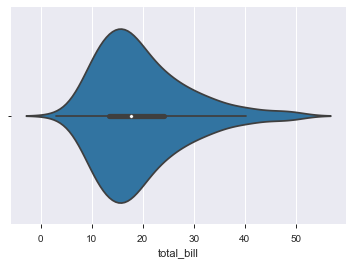

In [137]:
sns.violinplot(x = tips.total_bill) # single series plot

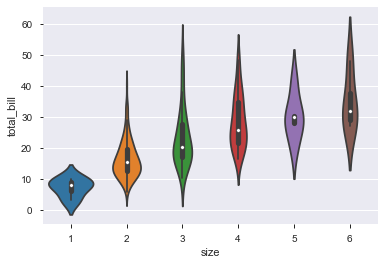

In [138]:
# plot for x, y
sns.violinplot(x = 'size' , y ='total_bill' , data = tips)

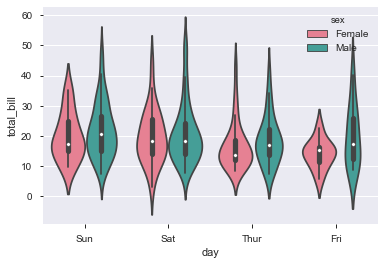

In [139]:
# use hue, and palette 
sns.violinplot(x ='day' , y ='total_bill' , hue = 'sex', data = tips, palette = 'husl')

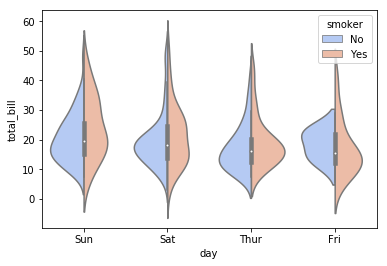

In [83]:
# use hue split
sns.violinplot(x ='day' , y ='total_bill' , hue = 'smoker', data = tips, palette = 'coolwarm', split = True)

In [140]:
### violin part II to go thru later on

# 7. Seaborn - Clustermap & HeatMap

In [145]:
flights = pd.read_csv('./seaborn-data/flights.csv')

In [146]:
flights.sample(5)

year     month  passengers
67   1954    August         293
94   1956  November         271
129  1959   October         407
95   1956  December         306
100  1957       May         355

In [147]:
flights.shape

(144, 3)

In [148]:
flights = flights.pivot('month', 'year', 'passengers') # pivot: row, column , value

In [149]:
flights

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
April       129   135   163   181   235   227   269   313   348   348   396   
August      148   170   199   242   272   293   347   405   467   505   559   
December    118   140   166   194   201   229   278   306   336   337   405   
February    118   126   150   180   196   188   233   277   301   318   342   
January     112   115   145   171   196   204   242   284   315   340   360   
July        148   170   199   230   264   302   364   413   465   491   548   
June        135   149   178   218   243   264   315   374   422   435   472   
March       132   141   178   193   236   235   267   317   356   362   406   
May         121   125   172   183   229   234   270   318   355   363   420   
November    104   114   146   172   180   203   237   271   305   310   362   
October     119   133   162   191   211   229   274   306   347   359   407   
September   136   158   184   209   237   259   312   355   404   404   463   

year       1960  
month            
April       461  
August      606  
December    432  
February    391  
January     417  
July        622  
June        535  
March       419  
May         472  
November    390  
October     461  
September   508

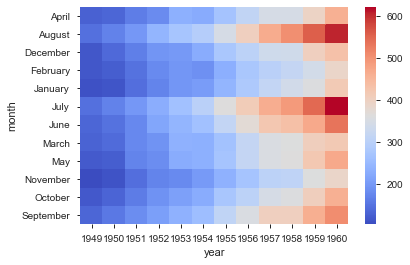

In [150]:
sns.heatmap(flights, cmap = 'coolwarm')

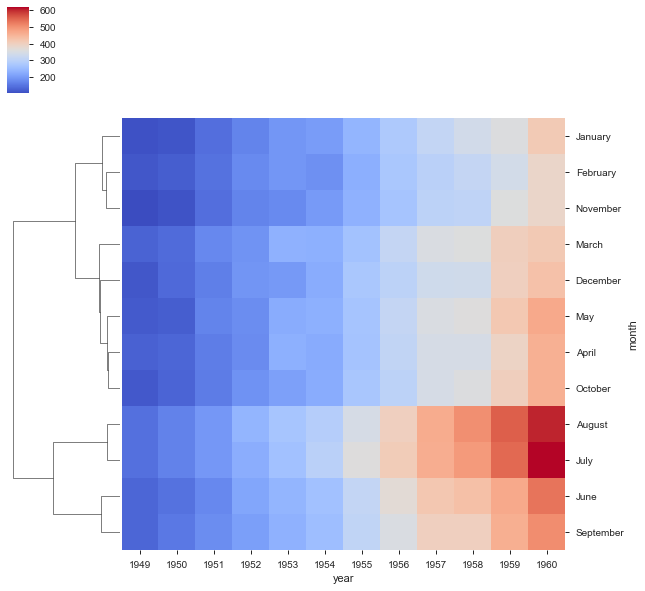

In [151]:
sns.clustermap(flights, col_cluster = False, cmap = 'coolwarm') # cluster only by row

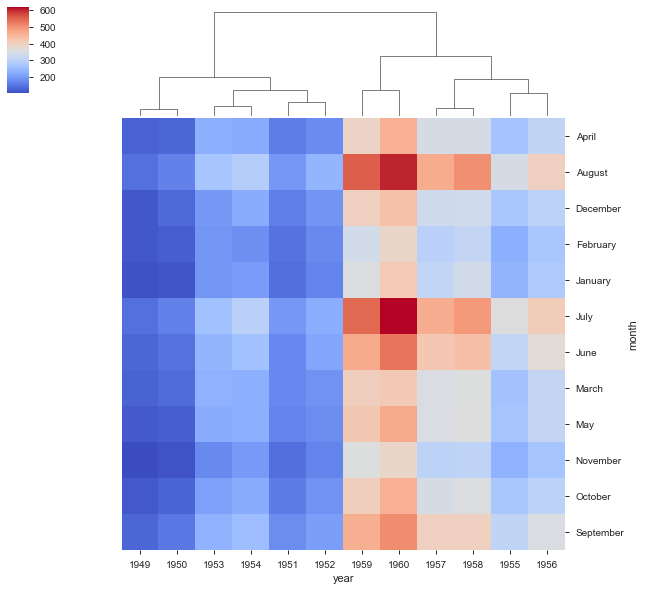

In [152]:
sns.clustermap(flights, row_cluster = False, cmap = 'coolwarm') # cluster only by row

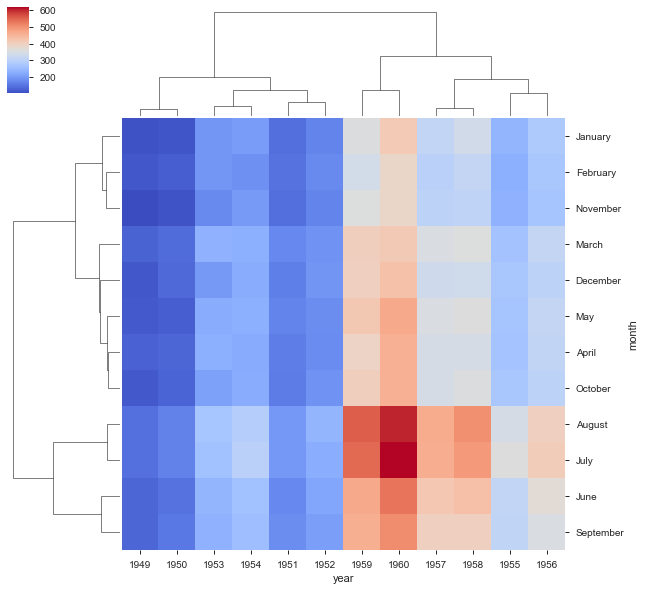

In [153]:
sns.clustermap(flights, cmap = 'coolwarm')

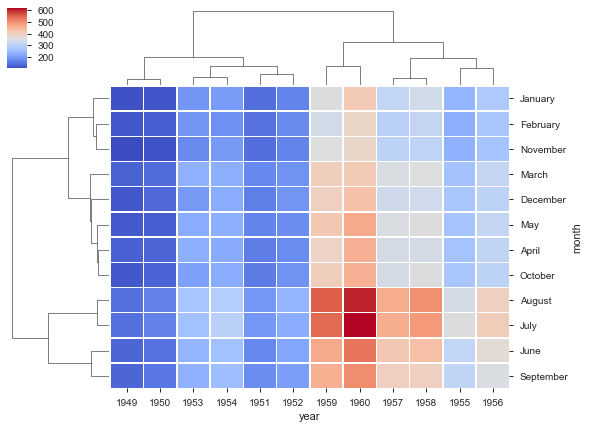

In [154]:
sns.clustermap(flights, cmap = 'coolwarm', linewidth = 0.5, figsize =(9,7)) # use the figsize

In [155]:
# standarlize across col or rows

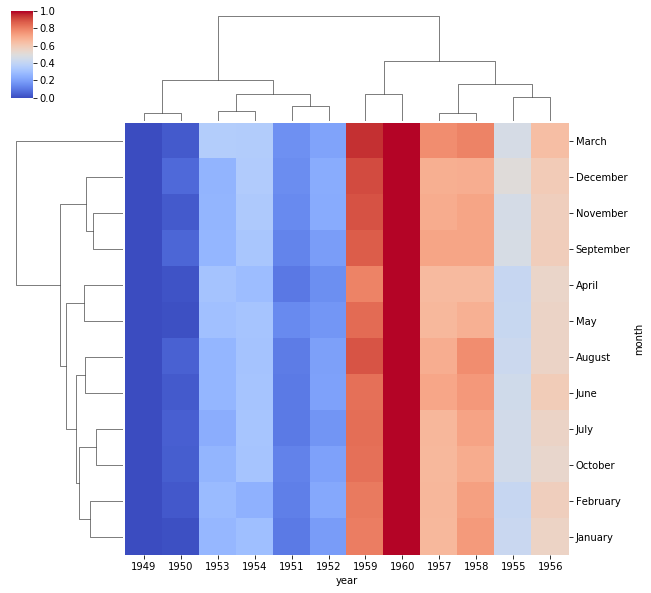

In [101]:
sns.clustermap(flights, standard_scale =0, cmap ='coolwarm')

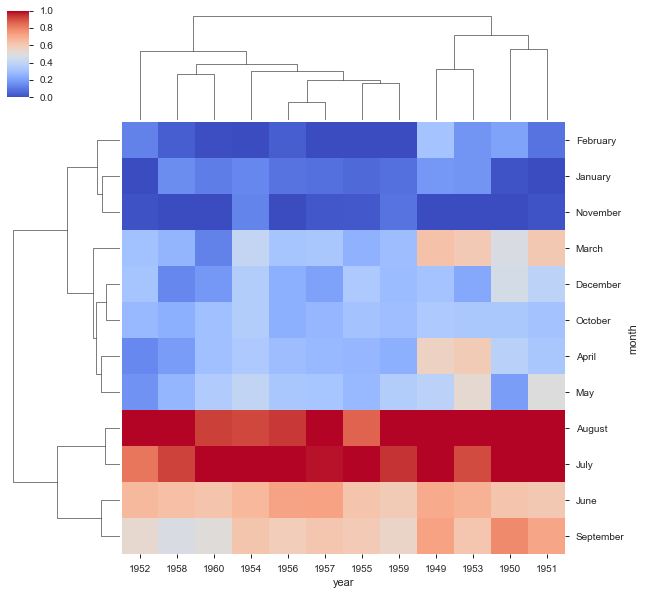

In [156]:
sns.clustermap(flights, standard_scale =1, cmap ='coolwarm')

In [157]:
# normalizing our dateset = z_score = 0 for rows, 1 for cols

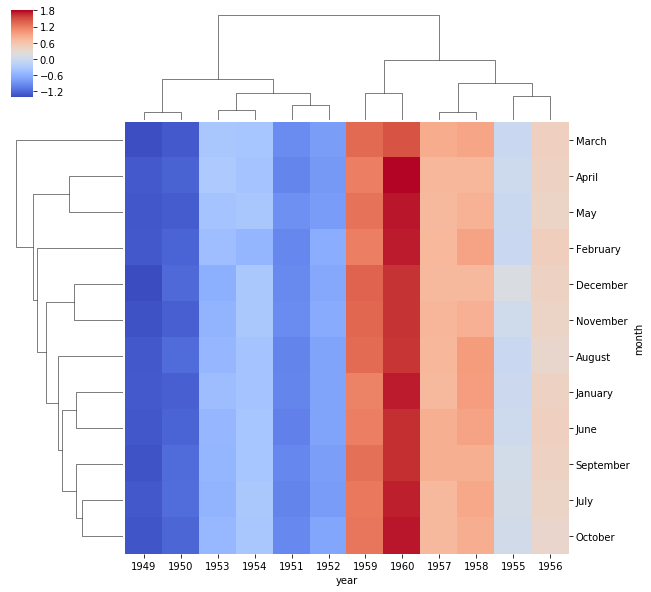

In [104]:
sns.clustermap(flights, z_score = 0, cmap = 'coolwarm')   # can try z_score with 1

# 7. Seaborn - Heatmap

In [158]:
# use numpy to generate data series

In [159]:
normal = np. random.rand(12, 15)

In [160]:
normal.max()

0.9953928045872412

In [161]:
normal.min()

0.00043212912672396797

In [162]:
normal.shape

(12, 15)

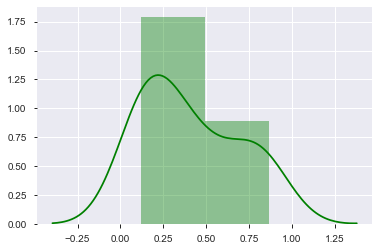

In [163]:
sns.distplot(normal[0], color = 'green')

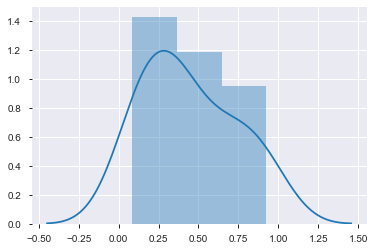

In [164]:
sns.distplot(normal[1])

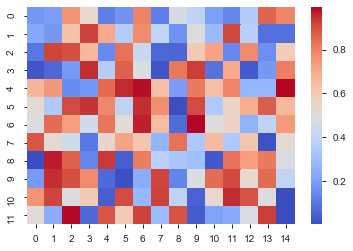

In [165]:
sns.heatmap(normal, cmap = 'coolwarm')

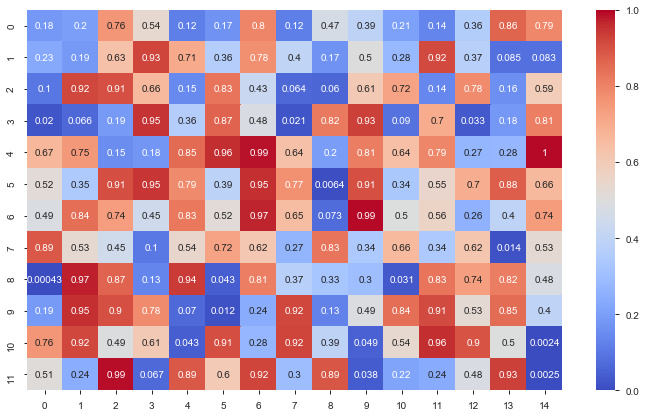

In [173]:
plt.figure(figsize = (12, 7))
sns.heatmap(normal, annot = True, cmap ='coolwarm', vmin =0, vmax = 1)

In [174]:
# f = sns.load_dataset('flights')
f = flights

In [175]:
f.sample(5)

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
February    118   126   150   180   196   188   233   277   301   318   342   
May         121   125   172   183   229   234   270   318   355   363   420   
September   136   158   184   209   237   259   312   355   404   404   463   
July        148   170   199   230   264   302   364   413   465   491   548   
November    104   114   146   172   180   203   237   271   305   310   362   

year       1960  
month            
February    391  
May         472  
September   508  
July        622  
November    390

In [176]:
# fp = f.pivot_table(index = 'year', columns = 'month', values = 'passengers', aggfunc = 'sum')

In [177]:
fp = f
fp.sample(5)

year       1949  1950  1951  1952  1953  1954  1955  1956  1957  1958  1959  \
month                                                                         
January     112   115   145   171   196   204   242   284   315   340   360   
December    118   140   166   194   201   229   278   306   336   337   405   
April       129   135   163   181   235   227   269   313   348   348   396   
August      148   170   199   242   272   293   347   405   467   505   559   
September   136   158   184   209   237   259   312   355   404   404   463   

year       1960  
month            
January     417  
December    432  
April       461  
August      606  
September   508

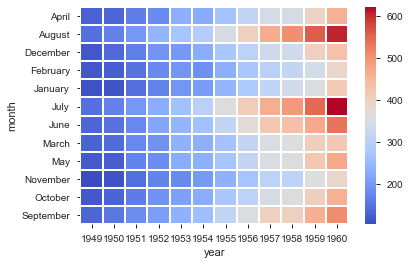

In [178]:
sns.heatmap(fp, cmap ='coolwarm', cbar = True, linewidths = 1, fmt ='d')

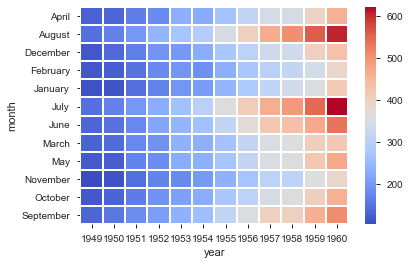

In [179]:
sns.heatmap(fp, cmap ='coolwarm', cbar = True, linewidths = 1, fmt ='d')

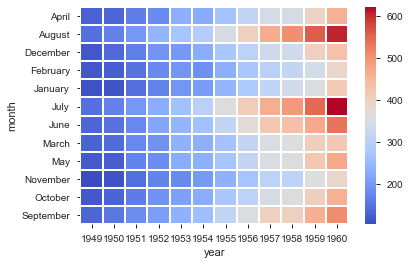

In [180]:
sns.heatmap(fp, cmap ='coolwarm', cbar = True, linewidths = 1)

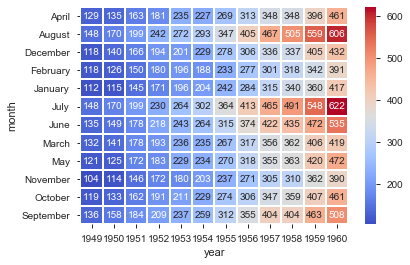

In [181]:
sns.heatmap(fp, cmap ='coolwarm', cbar = True, linewidths = 1, annot = True, fmt ='d') # can use vmin, vmax Para also

# 8. Seaborn - Facet Plot

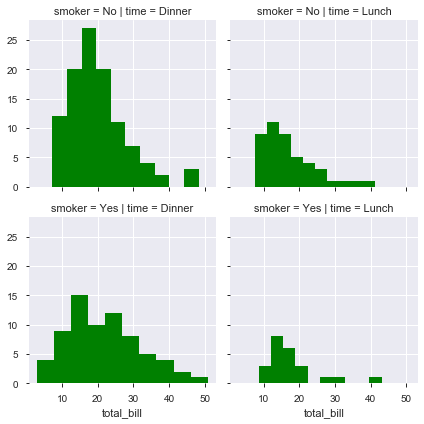

In [191]:
# good to use when knowing not many pairs  (in this case 4 only)

x = sns.FacetGrid(tips, row = 'smoker', col = 'time')
x = x.map(plt.hist, 'total_bill', color ='green')

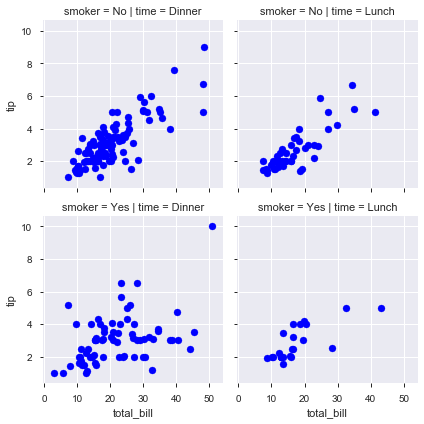

In [194]:
x = sns.FacetGrid(tips, row = 'smoker', col = 'time')
x = x.map(plt.scatter, 'total_bill', 'tip', color ='blue') # at least two para for scatter plot

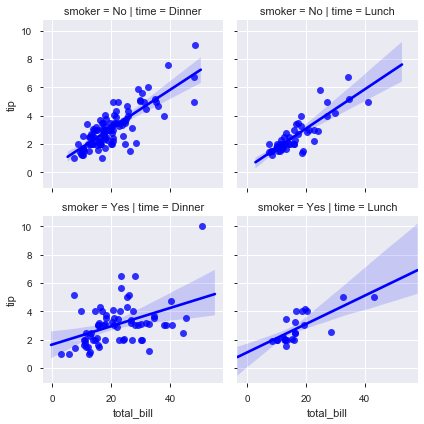

In [211]:
# plt.figure(figsize = (16, 9)) # looks not working this way for FacetGrid, use size para directly

x = sns.FacetGrid(tips, row = 'smoker', col = 'time', size = 3)
x = x.map(sns.regplot, 'total_bill', 'tip', color ='blue') # at least two para for regression plot

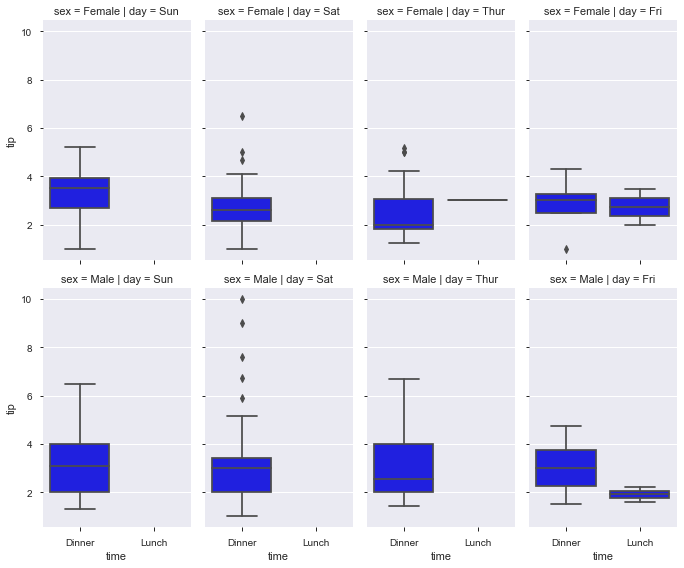

In [226]:
x = sns.FacetGrid(tips,  col = 'day', size = 4, row= 'sex', aspect = 0.6, palette = 'coolwarm') # use size, and aspect to adjust the graphic
x = x.map(sns.boxplot, 'time', 'tip', color = 'b') 

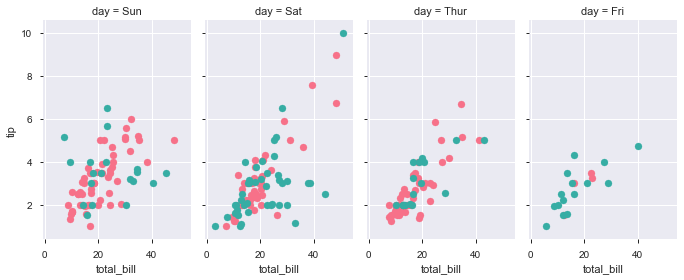

In [235]:
x = sns.FacetGrid(tips,  col = 'day', size = 4, hue = 'smoker', aspect = 0.6, palette = 'husl') # use size, and aspect to adjust the graphic
x = x.map(plt.scatter, 'total_bill', 'tip') 

# 9. Seaborn - KDE plot

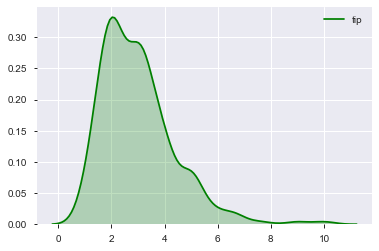

In [239]:
sns.kdeplot(tips.tip, shade = True, color = 'g') # for single sires

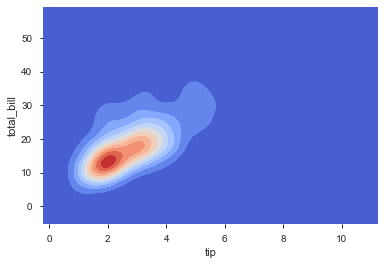

In [282]:
# sns.kdeplot(x, y) -- kde for two dimensional plot

sns.kdeplot(tips.tip, tips.total_bill, shade = True, cmap = 'coolwarm', color ='g') # for single sires

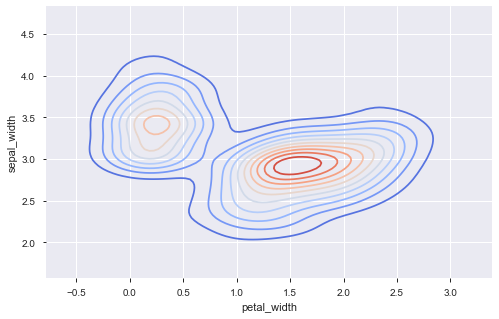

In [290]:
# sns.kdeplot(x, y)

plt.figure(figsize = (8, 5))
sns.kdeplot(iris.petal_width, iris.sepal_width, shade = False, cmap ='coolwarm', level = 20)

In [278]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

# 10. Seaborn - Joint Plot


In [293]:
tips.sample(5)

sepal_length  sepal_width  petal_length  petal_width     species
5             5.4          3.9           1.7          0.4      setosa
12            4.8          3.0           1.4          0.1      setosa
98            5.1          2.5           3.0          1.1  versicolor
111           6.4          2.7           5.3          1.9   virginica
106           4.9          2.5           4.5          1.7   virginica

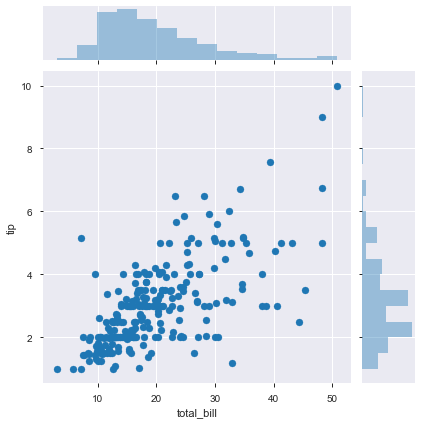

In [300]:
# by default, jointplot  use scatter, and dist

sns.jointplot(x = 'total_bill', y='tip', data = tips)

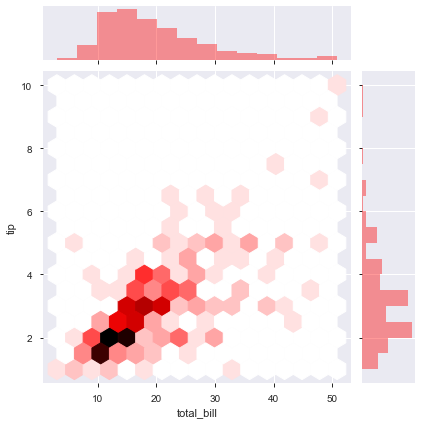

In [305]:
# what does HEX mean, most use cases about what?

sns.jointplot(x = 'total_bill', y='tip', data = tips, kind ='hex', color ='r')

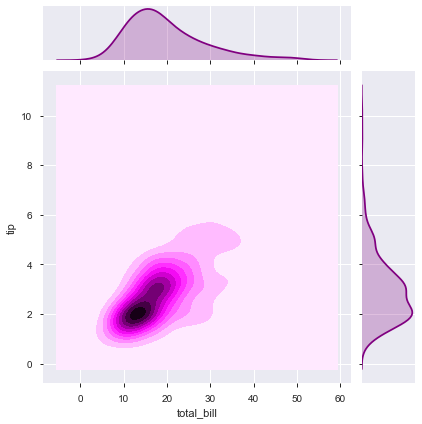

In [309]:
sns.jointplot(x = 'total_bill', y='tip', data = tips, kind ='kde', color ='purple')

In [310]:
from scipy.statsb import spearmanr

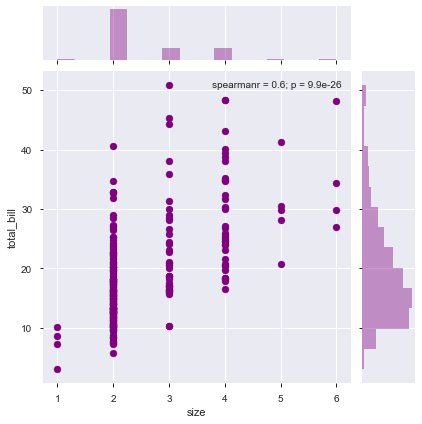

In [313]:
sns.jointplot(x = 'size', y='total_bill', data = tips, stat_func  =spearmanr, color ='purple')

# 11. Seaborn - Regression Regplot

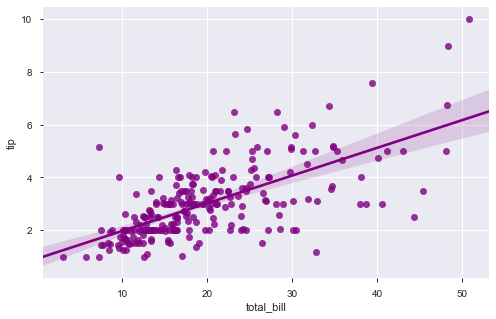

In [319]:
plt.figure(figsize = (8, 5))

sns.regplot(x=tips.total_bill, y=tips.tip, color = 'purple')

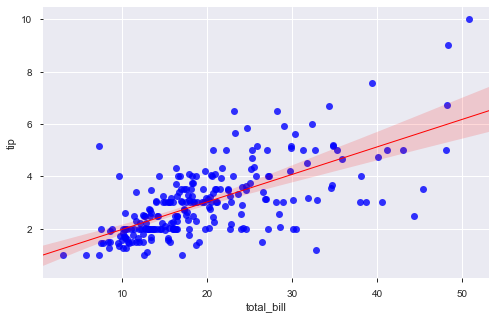

In [324]:
plt.figure(figsize = (8, 5))
sns.regplot(x='total_bill', y='tip',data = tips, color = 'purple', \
            scatter_kws  = {'marker':'D', 'color': 'blue'}, \
            line_kws = {'color':'red', 'linewidth': 1})

# 12. Seaborn - Pairplot
#### Good to use when need to select value pairs for correlation / distribution analysis

In [182]:
# iris = pd.read_csv('./seaborn-data/iris.csv')
# tips = pd.read_csv('./seaborn-data/tips.csv')

In [183]:
iris = pd.read_csv('./seaborn-data/iris.csv')
tips = pd.read_csv('./seaborn-data/tips.csv')

In [184]:
iris.head()

sepal_length  sepal_width  petal_length  petal_width species
0           5.1          3.5           1.4          0.2  setosa
1           4.9          3.0           1.4          0.2  setosa
2           4.7          3.2           1.3          0.2  setosa
3           4.6          3.1           1.5          0.2  setosa
4           5.0          3.6           1.4          0.2  setosa

In [185]:
tips.head()

total_bill   tip     sex smoker  day    time  size
0       16.99  1.01  Female     No  Sun  Dinner     2
1       10.34  1.66    Male     No  Sun  Dinner     3
2       21.01  3.50    Male     No  Sun  Dinner     3
3       23.68  3.31    Male     No  Sun  Dinner     2
4       24.59  3.61  Female     No  Sun  Dinner     4

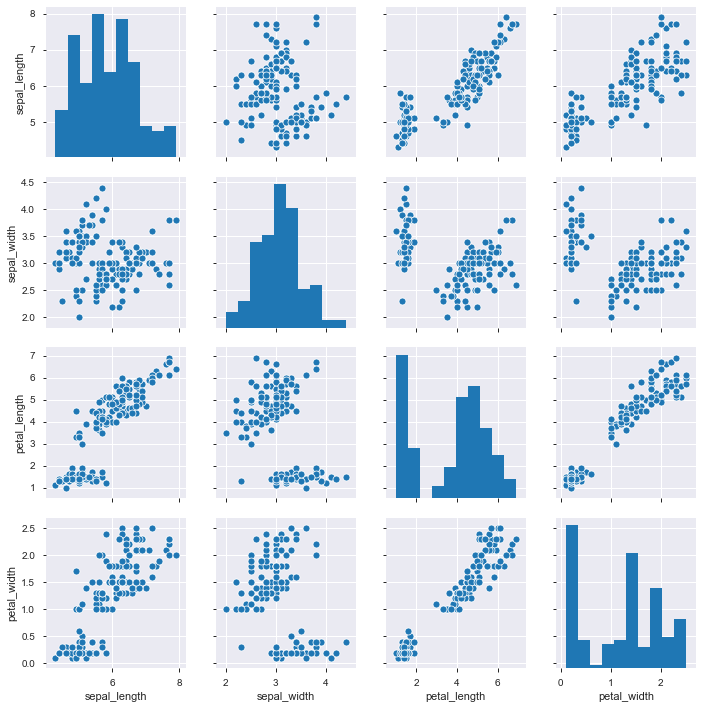

In [186]:
sns.pairplot(iris ) # good for not having too many pair variable

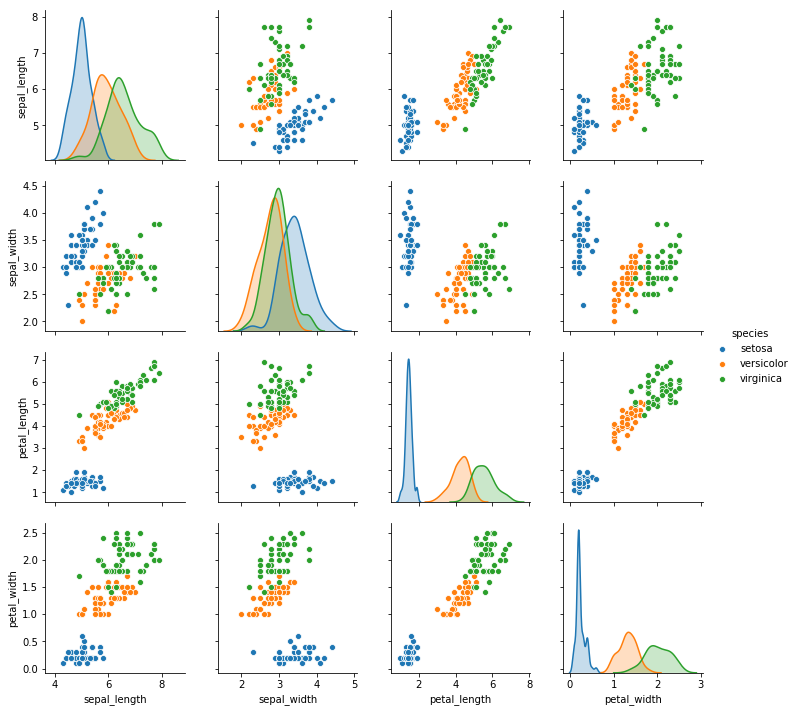

In [138]:
sns.pairplot(iris, hue ='species')

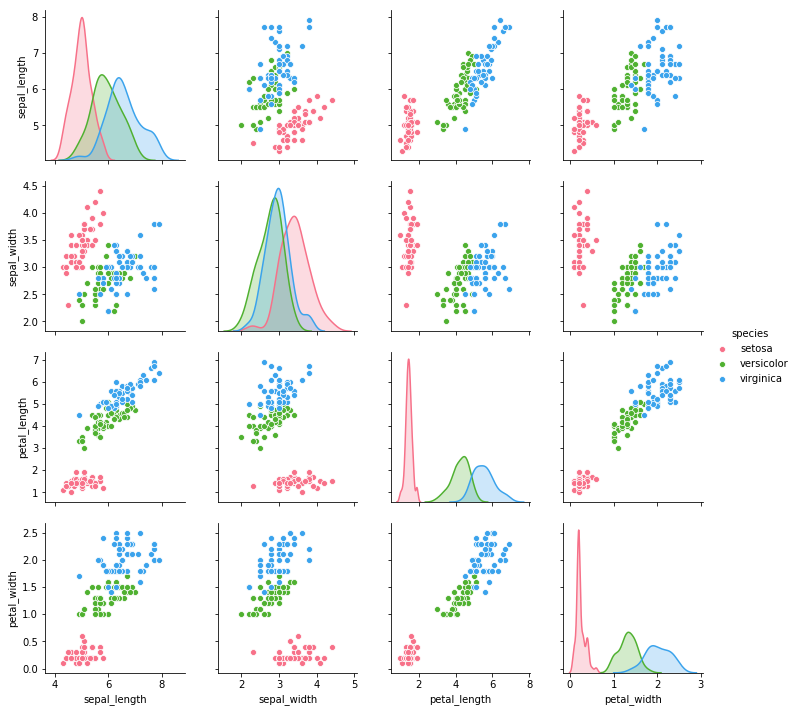

In [139]:
sns.pairplot(iris, hue="species", palette="husl")

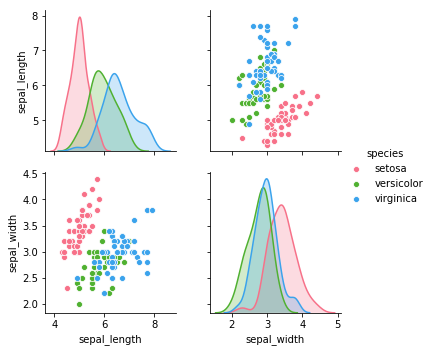

In [140]:
sns.pairplot(iris, vars=['sepal_length', 'sepal_width'], palette = 'husl', hue = 'species')

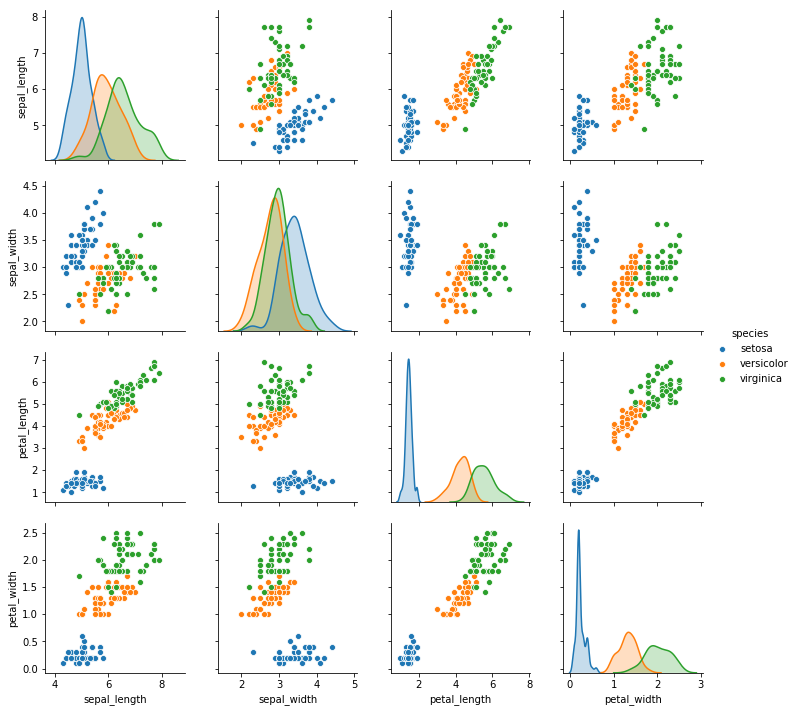

In [141]:
sns.pairplot(iris, diag_kind ='kde', hue ='species')

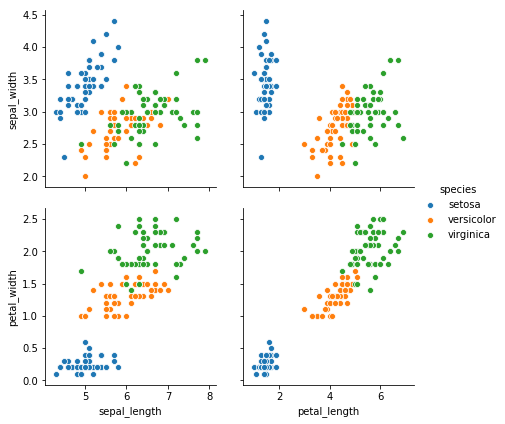

In [142]:
sns.pairplot(iris, diag_kind ='kde', hue ='species',  height = 3,\
             x_vars =['sepal_length','petal_length'], \
             y_vars =['sepal_width','petal_width'],
            )

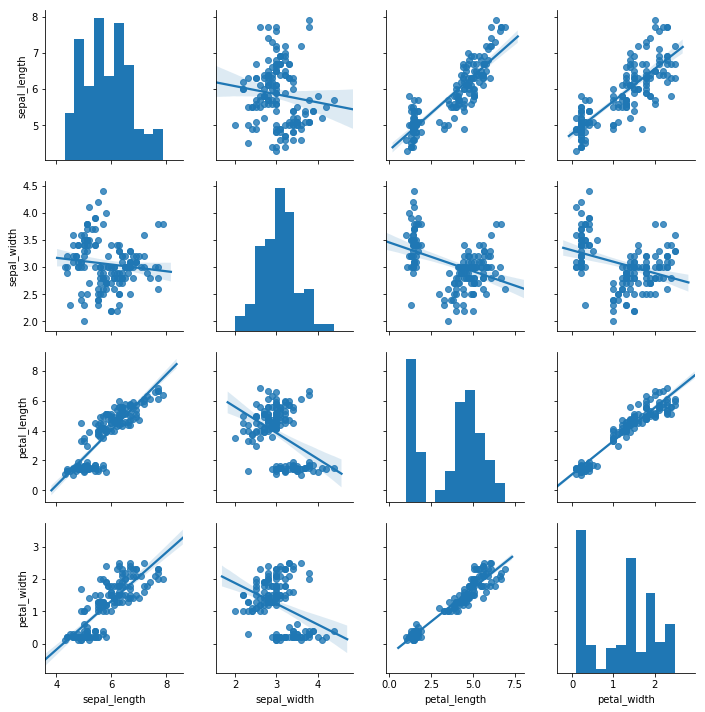

In [143]:
sns.pairplot(iris, kind ='reg') # 增加线性回归

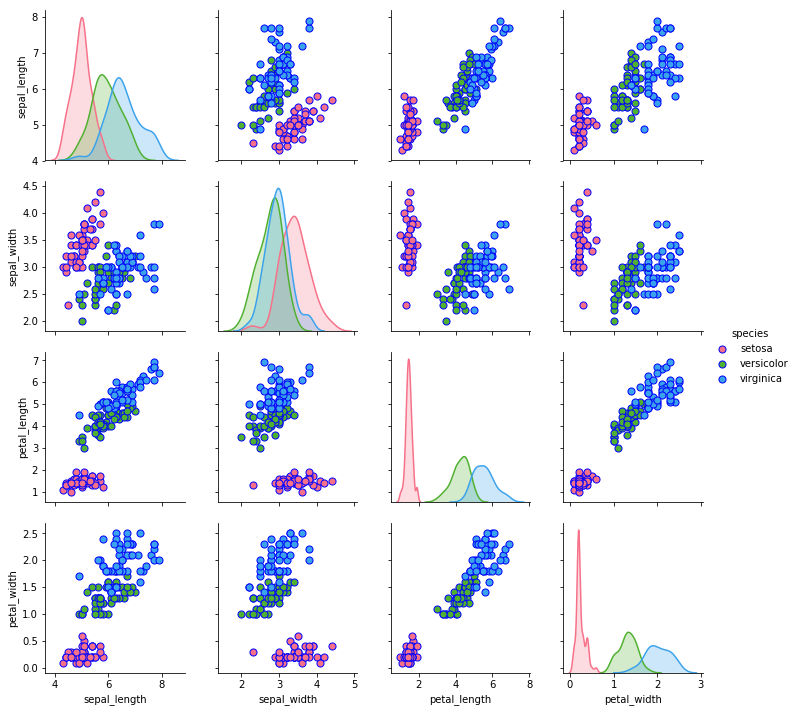

In [144]:
sns.pairplot(iris, diag_kind="kde", markers="o", palette ='husl', hue = 'species', \
            plot_kws = dict(s=50, edgecolor="b", linewidth=1), \
            diag_kws = dict(shade=True))